<a href="https://colab.research.google.com/github/ariefpurnamamuharram/MyTransformerResearch/blob/master/Deep_Learning_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning with PyTorch
____
YouTube videos:
- https://www.youtube.com/watch?v=c36lUUr864M

Basics of Tensor:
- torch.add(x,y) --> Addition of x and y
- torch.mul(x,y) --> Multiplication of x and y
- torch.rand(n)
- torch.sub(x,y) --> Substraction of x and y
- torch.view(1) --> Reshaping Torch Tensor

GPU functions:
- torch.cuda.is_available() --> Check if CUDA is available

In [27]:
# Install the required packages
!pip install torch torchvision torchaudio
!pip install scikit-learn

In [ ]:
# Basics of Tensor
import torch
import numpy as np

if torch.cuda.is_available(): # Check if CUDA is available
  device = torch.device("cuda") # Select CUDA device (ex: "CUDA:0")
  x = torch.ones(5, device=device) # Move Tensor to the GPU
  y = torch.ones(5)
  y = y.to(device) # Move Tensor to the GPU
  z = x + y # Processed at the GPU level
  # z.numppy(), will produce an error. NumPy only can be processed at CPU level
  z = z.to("CPU") # Move the Tensor to the CPU

In [ ]:
# Autograd
# Gradient (Grad) is important in our model optimization

import torch

x = torch.rand(3, requires_grad=True) # By default is False
print(x)

y = x+2
print(y)
z = y*y*2
#z = z.mean()
print(z)

v = torch.tensor([0.1, 1.0, 0.01], dtype=torch.float32)
z.backward(v) # dz/dx, Jacobian products
print(x.grad)

# ----
# Stop PyTorch treating the gradient functions and tracking history in 
# our compational graphs.
# x.requires_grad_(False)
# x.detach()
# with torch.no_grad()

a = torch.rand(3, requires_grad=True) # By default is False
print(a)

a.requires_grad_(False)
print(a)

# ---

weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
  model_output = (weights*3).sum()

  model_output.backward()

  print(weights.grad)

  # Clear it before the next epoch so the grad value is still right.
  weights.grad.zero_()

tensor([0.3010, 0.5801, 0.3912], requires_grad=True)
tensor([2.3010, 2.5801, 2.3912], grad_fn=<AddBackward0>)
tensor([10.5891, 13.3141, 11.4357], grad_fn=<MulBackward0>)
tensor([ 0.9204, 10.3205,  0.0956])
tensor([0.2824, 0.7041, 0.6977], requires_grad=True)
tensor([0.2824, 0.7041, 0.6977])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


In [ ]:
# Backpropagation
import torch

x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad=True) # Initial weight

# Forward pass and compute the loss
y_hat = w * x
loss = (y_hat - y)**2

print(loss) # Print loss

# Backward pass
loss.backward()
print(w.grad)

### Update weights
### next forward and backwards


tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


In [9]:
# Gradient Descent using Autograd
# ----
# - Prediction: PyTorch Model
# - Gradient computation: Autograd
# - Loss computation: PyTorch Loss
# - Parameter updates: PyTorch Optimizer

# Manual way, using NumPy

import numpy as np

# Linear regression
# f = W * x

# f = 2 * x
X = np.array([1, 2, 3, 4], dtype=np.float32)
Y = np.array([2, 4, 6, 8], dtype=np.float32)

w = 0.0

# Model prediction
def forward(x):
  return w * x

# Loss = MSE
def loss(y, y_predicted):
  return ((y_predicted - y)**2).mean()

# Gradient
# MSE = 1/N * (w*X - y)**2
# dJ/dw = 1/N 2x (w*x - y)
def gradient(x,y,y_predicted):
  return np.dot(2*x, y_predicted-y).mean()

print(f'Predicted before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 20

for epoc in range(n_iters):
  # prediction = forward pass
  y_pred = forward(X)

  # loss
  l = loss(Y, y_pred)

  # gradients
  dw = gradient(X,Y,y_pred)

  # update weights
  w -= learning_rate * dw

  if epoc % 1 == 0:
    print(f'epoch {epoc+1}: w = {w:.3}, loss = {l:.8f}')

print(f'Predicted after training: f(5) = {forward(5):.3f}')


Predicted before training: f(5) = 0.000
epoch 1: w = 1.2, loss = 30.00000000
epoch 2: w = 1.68, loss = 4.79999924
epoch 3: w = 1.87, loss = 0.76800019
epoch 4: w = 1.95, loss = 0.12288000
epoch 5: w = 1.98, loss = 0.01966083
epoch 6: w = 1.99, loss = 0.00314574
epoch 7: w = 2.0, loss = 0.00050331
epoch 8: w = 2.0, loss = 0.00008053
epoch 9: w = 2.0, loss = 0.00001288
epoch 10: w = 2.0, loss = 0.00000206
epoch 11: w = 2.0, loss = 0.00000033
epoch 12: w = 2.0, loss = 0.00000005
epoch 13: w = 2.0, loss = 0.00000001
epoch 14: w = 2.0, loss = 0.00000000
epoch 15: w = 2.0, loss = 0.00000000
epoch 16: w = 2.0, loss = 0.00000000
epoch 17: w = 2.0, loss = 0.00000000
epoch 18: w = 2.0, loss = 0.00000000
epoch 19: w = 2.0, loss = 0.00000000
epoch 20: w = 2.0, loss = 0.00000000
Predicted after training: f(5) = 10.000


In [13]:
# Gradient Descent using Autograd
# ----
# - Prediction: PyTorch Model
# - Gradient computation: Autograd
# - Loss computation: PyTorch Loss
# - Parameter updates: PyTorch Optimizer

# Tensor way, using PyTorch

import torch

# Linear regression
# f = W * x

# f = 2 * x
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# Model prediction
def forward(x):
  return w * x

# Loss = MSE
def loss(y, y_predicted):
  return ((y_predicted - y)**2).mean()

print(f'Predicted before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 100

for epoc in range(n_iters):
  # prediction = forward pass
  y_pred = forward(X)

  # loss
  l = loss(Y, y_pred)

  # gradients = bakcward pass
  l.backward() #dl/dw

  # update weights
  with torch.no_grad():
    w -= learning_rate * w.grad

  # zero gradients
  w.grad.zero_()

  if epoc % 10 == 0:
    print(f'epoch {epoc+1}: w = {w:.3}, loss = {l:.8f}')

print(f'Predicted after training: f(5) = {forward(5):.3f}')

Predicted before training: f(5) = 0.000
epoch 1: w = 0.3, loss = 30.00000000
epoch 11: w = 1.67, loss = 1.16278565
epoch 21: w = 1.93, loss = 0.04506890
epoch 31: w = 1.99, loss = 0.00174685
epoch 41: w = 2.0, loss = 0.00006770
epoch 51: w = 2.0, loss = 0.00000262
epoch 61: w = 2.0, loss = 0.00000010
epoch 71: w = 2.0, loss = 0.00000000
epoch 81: w = 2.0, loss = 0.00000000
epoch 91: w = 2.0, loss = 0.00000000
Predicted after training: f(5) = 10.000


In [25]:
# Training Pipeline: Model/Loss/Optimizer

# 1) Design model (input, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
#     - forward pass: compute prediction
#     - backward pass: gradients
#     - update weights

import torch
import torch.nn as nn

# Rows as the number of the samples
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

X_test = torch.tensor([5], dtype=torch.float32)

n_samples, n_features = X.shape
print(n_samples, n_features) # 4 samples with 1 feature

input_size = n_features
output_size = n_features

# model = nn.Linear(input_size, output_size)

class LinearRegression(nn.Module):

  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()
    # define layers
    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.lin(x)

model = LinearRegression(input_size, output_size)

print(f'Predicted before training: f(5) = {model(X_test).item()}')

# Training
learning_rate = 0.01
n_iters = 1000

loss = nn.MSELoss()

# Stochastic Gradient Descent (SGD)
# model.parameters contains the weights
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoc in range(n_iters):
  # prediction = forward pass
  y_pred = model(X)

  # loss
  l = loss(Y, y_pred)

  # gradients = bakcward pass
  l.backward() #dl/dw

  # update weights
  optimizer.step()

  # zero gradients
  optimizer.zero_grad()

  if epoc % 100 == 0:
    [w, b] = model.parameters()
    print(f'epoch {epoc+1}: w = {w[0][0].item():.3}, loss = {l:.8f}')

print(f'Predicted after training: f(5) = {model(X_test).item()}')

4 1
Predicted before training: f(5) = -3.603912353515625
epoch 1: w = -0.318, loss = 55.37839508
epoch 101: w = 1.79, loss = 0.06692869
epoch 201: w = 1.84, loss = 0.03674300
epoch 301: w = 1.88, loss = 0.02017150
epoch 401: w = 1.91, loss = 0.01107389
epoch 501: w = 1.94, loss = 0.00607944
epoch 601: w = 1.95, loss = 0.00333753
epoch 701: w = 1.96, loss = 0.00183227
epoch 801: w = 1.97, loss = 0.00100590
epoch 901: w = 1.98, loss = 0.00055222
Predicted after training: f(5) = 9.970149040222168


epoch: 10, loss = 4436.9639
epoch: 20, loss = 3308.0378
epoch: 30, loss = 2491.6191
epoch: 40, loss = 1900.5485
epoch: 50, loss = 1472.1865
epoch: 60, loss = 1161.4496
epoch: 70, loss = 935.8409
epoch: 80, loss = 771.9070
epoch: 90, loss = 652.6998
epoch: 100, loss = 565.9565


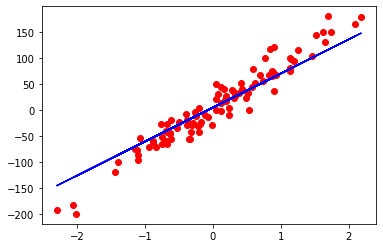

In [36]:
# Linear Regression

# 1) Design model (input, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
#     - forward pass: compute prediction
#     - backward pass: gradients
#     - update weights

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) prepare data
X_numpy, Y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(Y_numpy.astype(np.float32))
Y = Y.view(Y.shape[0], 1)

n_samples, n_features = X.shape

# 1) model
input_size = n_features
ouput_size = 1
model = nn.Linear(input_size, output_size)

# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) training loop
num_epochs = 100
for epoch in range(num_epochs):
  # forward pass and loss
  y_predicted = model(X)
  loss = criterion(y_predicted, Y)

  # backward pass
  loss.backward()

  # update
  optimizer.step()

  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, Y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

In [56]:
# Logistic Regression

# 1) Design model (input, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
#     - forward pass: compute prediction
#     - backward pass: gradients
#     - update weights

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 0) prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape
print(n_samples, n_features)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Convert to tensor
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
Y_train = torch.from_numpy(Y_train.astype(np.float32))
Y_test = torch.from_numpy(Y_test.astype(np.float32))

y_train = Y_train.view(Y_train.shape[0], 1)
y_test = Y_test.view(Y_test.shape[0], 1)

# 1) model
# f = wx + b, sigmoid at the end
class LogisticRegression(nn.Module):

  def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(n_input_features, 1)

  def forward(self, x):
    y_predicted = torch.sigmoid(self.linear(x))
    return y_predicted

model = LogisticRegression(n_features)

# 2) loss and optimizer
# BCELoss: Binary Cross Entropy Loss
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) training loop
num_epochs = 100
for epoch in range(num_epochs):
  # forward pass and loss
  y_predicted = model(X_train)
  loss = criterion(y_predicted, y_train)

  # backward pass
  loss.backward()

  # updates
  optimizer.step()

  # zero gradients
  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

with torch.no_grad():
  y_predicted = model(X_test)
  y_predicted_cls = y_predicted.round()
  acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
  print(f'accuracy = {acc:.4f}')

569 30
epoch: 10, loss = 0.6803
epoch: 20, loss = 0.5225
epoch: 30, loss = 0.4331
epoch: 40, loss = 0.3765
epoch: 50, loss = 0.3372
epoch: 60, loss = 0.3081
epoch: 70, loss = 0.2854
epoch: 80, loss = 0.2672
epoch: 90, loss = 0.2522
epoch: 100, loss = 0.2395
accuracy = 0.9298


In [68]:
# Dataset & DataLoader

import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineDataset(Dataset):

  def __init__(self, dataset):
    # data loading
    xy = np.loadtxt(dataset, delimiter=",", dtype=np.float32, skiprows=1)
    self.x = torch.from_numpy(xy[:, 1:])
    self.y = torch.from_numpy(xy[:, [0]]) # n_samples, 1
    self.n_samples = xy.shape[0]
  
  def __getitem__(self, index):
    # dataset[0]
    return self.x[index], self.y[index]
  
  def __len__(self):
    # len(dataset)
    return self.n_samples

WINE_DATASET_CSV = 'https://raw.githubusercontent.com/python-engineer/pytorchTutorial/master/data/wine/wine.csv'

dataset = WineDataset(WINE_DATASET_CSV)
dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=2)

# training loop
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples / 4)
print(total_samples, n_iterations)

for epoch in range(num_epochs):
  for i, (inputs, labels) in enumerate(dataloader):
    # forward backward, update
    if (i+1) % 5 == 0:
      print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_iterations}, inputs {inputs.shape}')


178 45
epoch 1/2, step 5/45, inputs torch.Size([4, 13])
epoch 1/2, step 10/45, inputs torch.Size([4, 13])
epoch 1/2, step 15/45, inputs torch.Size([4, 13])
epoch 1/2, step 20/45, inputs torch.Size([4, 13])
epoch 1/2, step 25/45, inputs torch.Size([4, 13])
epoch 1/2, step 30/45, inputs torch.Size([4, 13])
epoch 1/2, step 35/45, inputs torch.Size([4, 13])
epoch 1/2, step 40/45, inputs torch.Size([4, 13])
epoch 1/2, step 45/45, inputs torch.Size([2, 13])
epoch 2/2, step 5/45, inputs torch.Size([4, 13])
epoch 2/2, step 10/45, inputs torch.Size([4, 13])
epoch 2/2, step 15/45, inputs torch.Size([4, 13])
epoch 2/2, step 20/45, inputs torch.Size([4, 13])
epoch 2/2, step 25/45, inputs torch.Size([4, 13])
epoch 2/2, step 30/45, inputs torch.Size([4, 13])
epoch 2/2, step 35/45, inputs torch.Size([4, 13])
epoch 2/2, step 40/45, inputs torch.Size([4, 13])
epoch 2/2, step 45/45, inputs torch.Size([2, 13])


In [84]:
# Dataset Transforms

import torch
import torchvision

class WineDataset(Dataset):

  def __init__(self, dataset, transform=None):
    # data loading
    xy = np.loadtxt(dataset, delimiter=",", dtype=np.float32, skiprows=1)
    self.n_samples = xy.shape[0]

    self.x = xy[:, 1:]
    self.y = xy[:, [0]]

    self.transform = transform
  
  def __getitem__(self, index):
    # dataset[0]
    sample = self.x[index], self.y[index]

    if self.transform:
      sample = self.transform(sample)
    
    return sample
  
  def __len__(self):
    # len(dataset)
    return self.n_samples

class ToTensor:
  def __call__(self, sample):
    inputs, targets = sample
    return torch.from_numpy(inputs), torch.from_numpy(targets)

class MulTransform:
  def __init__(self, factor):
    self.factor = factor
  
  def __call__(self, sample):
    inputs, target = sample
    inputs *= self.factor
    return inputs, target

WINE_DATASET_CSV_URL = 'https://raw.githubusercontent.com/python-engineer/pytorchTutorial/master/data/wine/wine.csv'

dataset = WineDataset(dataset=WINE_DATASET_CSV_URL, transform=ToTensor())
first_data = dataset[0]
features, labels = first_data
print(features)
print(type(features), type(labels))

composed = torchvision.transforms.Compose([ToTensor(), MulTransform(4)])
dataset = WineDataset(dataset=WINE_DATASET_CSV_URL, transform=composed)
first_data = dataset[0]
features, labels = first_data
print(features)
print(type(features), type(labels))

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03])
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([5.6920e+01, 6.8400e+00, 9.7200e+00, 6.2400e+01, 5.0800e+02, 1.1200e+01,
        1.2240e+01, 1.1200e+00, 9.1600e+00, 2.2560e+01, 4.1600e+00, 1.5680e+01,
        4.2600e+03])
<class 'torch.Tensor'> <class 'torch.Tensor'>


In [5]:
# Softmax & Cross Entropy
# ----
# Softmax

import torch
import torch.nn as nn
import numpy as np

def softmax(x):
  return np.exp(x) / np.sum(np.exp(x), axis=0)

x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print('softmax numpy:', outputs)

x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0)
print(outputs)

softmax numpy: [0.65900114 0.24243297 0.09856589]
tensor([0.6590, 0.2424, 0.0986])


In [9]:
# Softmax & Cross Entropy
# ----
# CrossEntropyLoss

import torch
import torch.nn as nn
import numpy as np

loss = nn.CrossEntropyLoss()

# 3 samples
Y = torch.tensor([2, 0, 1])

# nsamples x nclasses = 3x3
Y_pred_good = torch.tensor([[0.1, 1.0, 2.1],[2.0, 1.0, 0.1],[0.1, 3.0, 0.1]])
Y_pred_bad = torch.tensor([[2.1, 2.0, 0.1],[0.1, 1.0, 2.1],[0.1, 3.0, 0.1]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(l1.item())
print(l2.item())

_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)

print(predictions1)
print(predictions2)

0.3018244206905365
1.7338258028030396
tensor([2, 0, 1])
tensor([0, 2, 1])


In [11]:
# Activation Functions
# -----------------------
# Most popular activation functions
# 1. Step functions -> Not used in practice
# 2. Sigmoid --> Typically used in binary classification problem
# 3. TanH --> Good choice in hidden layers
# 4. ReLU --> If you don't know what to use, just use a ReLU for hidden layers
# 5. Leaky ReLU --> Improved version of ReLU
# 6. Softmax

import torch
import torch.nn as nn
import torch.nn.functional as F

# option 1 (create nn modules)
class NeuralNet1(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(NeuralNet1, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size, 1)
    self.sigmoid = nn.Sigmoid()
  
  def forward(self, x):
    out = self.linear(x)
    out = self.relu(out)
    out = self.linear2(out)
    out = self.sigmoid(out)
    return out

class NeuralNet2(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(NeuralNet2, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.linear2 = nn.Linear(hidden_size, 1)
  
  def forward(self, x):
    out = torch.relu(self.linear1(x))
    out = torch.sigmoid(self.linear2(x))
    return out

torch.Size([100, 1, 28, 28]) torch.Size([100])
epoch 1/2, step 100/600, loss = 0.4297
epoch 1/2, step 200/600, loss = 0.3138
epoch 1/2, step 300/600, loss = 0.2831
epoch 1/2, step 400/600, loss = 0.4198
epoch 1/2, step 500/600, loss = 0.2959
epoch 1/2, step 600/600, loss = 0.1833
epoch 2/2, step 100/600, loss = 0.2834
epoch 2/2, step 200/600, loss = 0.1721
epoch 2/2, step 300/600, loss = 0.4287
epoch 2/2, step 400/600, loss = 0.1873
epoch 2/2, step 500/600, loss = 0.1509
epoch 2/2, step 600/600, loss = 0.2954
accuracy = 9.78


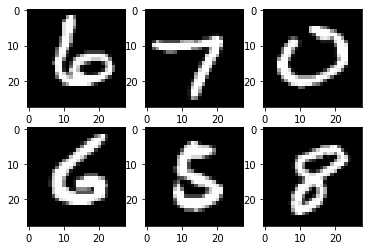

In [28]:
# Feed-Forward NeuralNet

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# device config
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# hyper parameters
input_size = 784 # 28x28, flattened into 1-D Tensor
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           download=True, 
                                           train=True, 
                                           transform=transforms.ToTensor())

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False,
                                          transform=transforms.ToTensor())

# DataLoader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size,
                                           shuffle=False)

examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(samples[i][0], cmap='gray')
plt.show

class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)
  
  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out

model = NeuralNet(input_size, hidden_size, num_classes)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # 100, 1, 28, 28
    # 100, 78
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    # forward
    outputs = model(images)
    loss = criterion(outputs, labels)

    # backwards
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

# test
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    output = model(images)

    # value, index
    _, predictions = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()
  
  acc = 100.0 * n_correct / n_samples
  print(f'accuracy = {acc}')